In [ ]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import math
from scipy import optimize
from scipy.special import binom
import statistics
from pprint import pprint
from random import uniform
from matplotlib import patches

In [118]:
#L1 - reading and writing distribution normal/uniform

def read_data(filename: str):
    """
    Function to read data from file
    :str filename: file to read
    :return:
    """
    data = pd.read_csv(filename, index_col=0)
    return data

def read_data_to_list(filename: str) -> list:
    """
    Return readed data to list instead of pandas dataframe
    :param filename:
    :return: list
    """
    var = read_data(filename)
    return var[var.columns[0]].values.tolist()

def generate_data(size: int, normal: bool,filename: str):
    """
    Function to generate binomial/normal distribution
    :int size: size of generated distribution
    :bool: True - normal, False - binomial
    :str filename: name of file with generated data
    :return none:
    """
    if normal:
        data = np.random.normal(size=size)
    else:
        data = np.random.uniform(size=size)
    pd.DataFrame(data).to_csv(filename)

In [119]:
# generating data from declared functions
generate_data(100, normal=False, filename="uniform.csv")
generate_data(100, normal=True, filename="normal.csv")

In [120]:
#normal


def calc_stats(dataset: list, s: float):
    mean = sum(dataset)/len(dataset)
    median = statistics.median(dataset)
    skew = 3*((mean-median)/s)
    kurt = (sum([((x-mean)**4)for x in dataset])/len(dataset)/s**4)-3
    return {
        "mean": mean,
        "median": median,
        "skew": skew,
        "kurtosis": kurt
    }

normal_data = read_data("normal.csv")
normal_data = normal_data[normal_data.columns[0]].values.tolist()
print("Normal:")
pprint(calc_stats(normal_data, 1))

uniform_data = read_data("uniform.csv")
uniform_data = uniform_data[uniform_data.columns[0]].values.tolist()
print("\n\nUniform:")
pprint(calc_stats(uniform_data, 1))

Normal:
{'kurtosis': -1.1069973518243232,
 'mean': -0.06119069987302408,
 'median': -0.2051623125662157,
 'skew': 0.43191483807957487}


Uniform:
{'kurtosis': -2.9851268765838928,
 'mean': 0.537557762488528,
 'median': 0.5573013624571359,
 'skew': -0.05923079990582358}


# Lista 2
Lista zakładała napisanie własnych testów statystycznych oraz przedstawienie wygernerowanych uprzednio rozkładów na wykresach

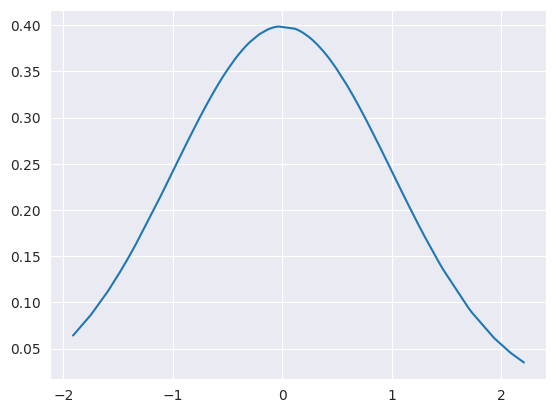

In [121]:
#generating normal distribution data plot
data = read_data_to_list("normal.csv")
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - sigma, mu + sigma, 100)
plt.plot(sorted(data), stats.norm.pdf(sorted(data), mu, sigma))
plt.show()

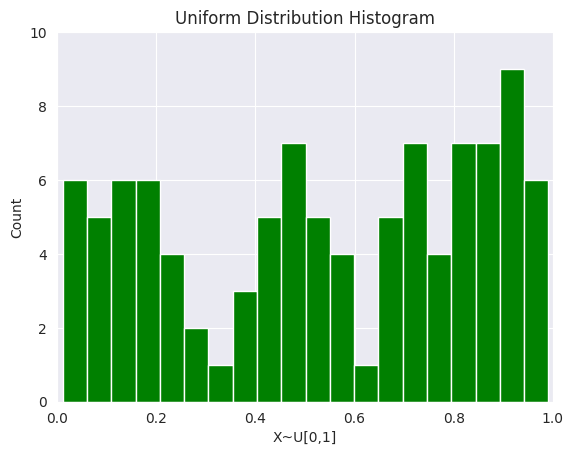

In [122]:
#generating Uniform distribution
data_lin = read_data_to_list("uniform.csv")
count, bins, ignored = plt.hist(data_lin, 20, facecolor='green')

plt.xlabel('X~U[0,1]')
plt.ylabel('Count')
plt.title("Uniform Distribution Histogram")
plt.axis([0, 1, 0, 10]) # x_start, x_end, y_start, y_end
plt.grid(True)

plt.show(block = False)

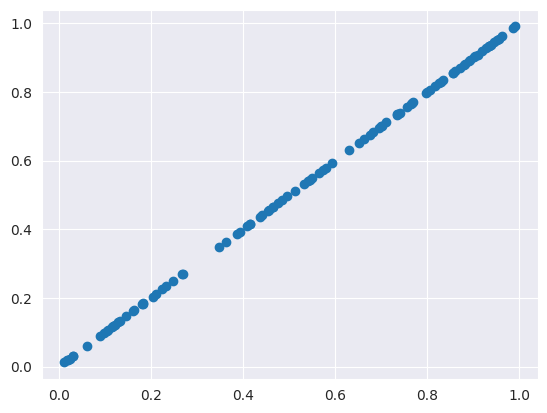

In [123]:
plt.scatter(sorted(data_lin), sorted(data_lin))

In [124]:
#Chi Square test
def chi_sqr_test(list_data: list, start, stop):
    BOX_VAL = 10
    unf_sorted = sorted(list_data)
    interval = abs(unf_sorted[0]-unf_sorted[-1]) / math.sqrt(len(unf_sorted))
    count_intervals = int(abs(start-stop)/interval)
    boxes = [0 for _ in range(count_intervals)]

    cnt_tmp = interval
    i = 0
    for x in unf_sorted:
        if x > cnt_tmp:
            cnt_tmp += interval
            if i < count_intervals - 1:
                i += 1
        if x <= cnt_tmp:
            boxes[i] += 1

    exp = [z - BOX_VAL for z in boxes]
    chi_sqr_val = round(sum((pow(x, 2)/BOX_VAL) for x in exp), 3)
    print(f"Chi square test: {chi_sqr_val}")
    return chi_sqr_val
chi_sqr_test(data_lin, 0,1)

Chi square test: 14.6


14.6

In [125]:
def shapiro_wilk_test(data_n: list):
    #for large datasets we need to cut it in half
    SW_TEST_DATA = [0.3751, 0.2574, 0.2260, 0.2032, 0.1847, 0.1691, 0.1554, 0.1430, 0.1317, 0.1212, 0.1113, 0.1020, 0.0932, 0.0846, 0.0764, 0.0685, 0.0608, 0.0532, 0.0459, 0.0386, 0.0314, 0.0244, 0.0174, 0.0104, 0.0035]
    data_n_ord_tmp = sorted(data_n)
    data_n_ord = data_n_ord_tmp[::2]
    mean = sum(data_n_ord)/len(data_n_ord)
    sq = sum([(val-mean)**2 for val in data_n_ord])
    if len(data_n_ord)%2 == 0:
        m = int(len(data_n_ord) / 2)
    else:
        m = int((len(data_n_ord)-1) / 2)
    b = sum([SW_TEST_DATA[idx]*(data_n_ord[len(data_n_ord)-1-idx]-data_n_ord[idx]) for idx in range(m)])
    return b**2/sq
shapiro_wilk_test(data_lin)

0.9097241881223858

# Lista 3
Lista zakładła zaimplementowanie własniego generatora liczb pseudolosowych

In [126]:
def prand_norm(n):
    final = np.zeros(n)
    for i in range(n):
        t = np.random.uniform(low=0, high=2 * np.pi, size=1)
        e = np.random.exponential(scale=1 / 1, size=1)
        x = math.cos(t) * math.sqrt(2*e)
        final[i] = x
    return final


def r(seed=[0], m=2**32, a=1664525, c=1013904223):
    """
    m: modulus
    a: multiplier
    c: increment

    """
    seed[0] = (a*seed[0] + c) % m
    return seed[0], seed[0]/m

uniform = [r()[1] for x in range(1000)]
print(scipy.stats.wilcoxon(uniform))
normal_data = prand_norm(1000)
print(scipy.stats.ttest_1samp(normal_data, popmean=0))
print(scipy.stats.normaltest(normal_data))

WilcoxonResult(statistic=0.0, pvalue=3.325859118934513e-165)
Ttest_1sampResult(statistic=-0.9242926578183523, pvalue=0.35555716370425716)
NormaltestResult(statistic=1.130420397541204, pvalue=0.5682406907086299)


# Lista 4
1. Obliczamy całkę metodą monte carlo
 1.1 Funkcja ta co liczy, parametr a (zakres a), parametr b (zakres b), F f(a - poczatek , b - koniec, F - wzor funkcji)
2. Obliczyć tą samą całkę metodą Riemana
3. Zaimplementować oba i porównać dwa wyniki

In [127]:
#Monte carlo

def calc_field(fnc, a, b, points: int ):
    local_min = optimize.fminbound(fnc, int(a), int(b))
    local_max = max([fnc(x) for x in np.arange(a,b,0.001)])
    if local_min > 0:
        lower_bound = 0
    else:
        lower_bound = local_min
    square = [
        [a,b],
        [lower_bound, local_max]
    ]
    hits = 0
    for point in range(points):
        point = [uniform(a,b), uniform(lower_bound, local_max)]
        if point[1] <= fnc(point[0]):
            hits += 1
    area = (b-a)*(local_max-lower_bound)
    return area*(hits/points)

In [128]:
#Riemman
def riemann(fnc, a, b, steps):
    rr = np.linspace(a, b, steps)
    summ = sum([abs(fnc((rr[idx]+rr[idx+1])/2)*(rr[idx+1]-rr[idx])) for idx in range(len(rr)-1)])
    return summ

In [129]:
def f(xdd):
    return xdd**2

print(f"Monte Carlo method {calc_field(f, 1, 7, 100000)}")
print(f"Riemanna Integral: {riemann(f, 1,7,10000)}")

TypeError: 'list' object is not callable

In [ ]:
#przyzjanę się że funkcja generowania tych krzywych jest zdarta z internetu ale na swoją obronę powiem że nie trzebabyło takowej samodzielnie impelentować
bernstein = lambda n, k, t: binom(n,k)* t**k * (1.-t)**(n-k)

def bezier(points, num=200):
    N = len(points)
    t = np.linspace(0, 1, num=num)
    curve = np.zeros((num, 2))
    for i in range(N):
        curve += np.outer(bernstein(N - 1, i, t), points[i])
    return curve

class Segment():
    def __init__(self, p1, p2, angle1, angle2, **kw):
        self.p1 = p1; self.p2 = p2
        self.angle1 = angle1; self.angle2 = angle2
        self.numpoints = kw.get("numpoints", 100)
        r = kw.get("r", 0.3)
        d = np.sqrt(np.sum((self.p2-self.p1)**2))
        self.r = r*d
        self.p = np.zeros((4,2))
        self.p[0,:] = self.p1[:]
        self.p[3,:] = self.p2[:]
        self.calc_intermediate_points(self.r)

    def calc_intermediate_points(self,r):
        self.p[1,:] = self.p1 + np.array([self.r*np.cos(self.angle1),
                                    self.r*np.sin(self.angle1)])
        self.p[2,:] = self.p2 + np.array([self.r*np.cos(self.angle2+np.pi),
                                    self.r*np.sin(self.angle2+np.pi)])
        self.curve = bezier(self.p,self.numpoints)


def get_curve(points, **kw):
    segments = []
    for i in range(len(points)-1):
        seg = Segment(points[i,:2], points[i+1,:2], points[i,2],points[i+1,2],**kw)
        segments.append(seg)
    curve = np.concatenate([s.curve for s in segments])
    return segments, curve

def ccw_sort(p):
    d = p-np.mean(p,axis=0)
    s = np.arctan2(d[:,0], d[:,1])
    return p[np.argsort(s),:]

def get_bezier_curve(a, rad=0.2, edgy=0):
    """ given an array of points *a*, create a curve through
    those points.
    *rad* is a number between 0 and 1 to steer the distance of
          control points.
    *edgy* is a parameter which controls how "edgy" the curve is,
           edgy=0 is smoothest."""
    p = np.arctan(edgy)/np.pi+.5
    a = ccw_sort(a)
    a = np.append(a, np.atleast_2d(a[0,:]), axis=0)
    d = np.diff(a, axis=0)
    ang = np.arctan2(d[:,1],d[:,0])
    f = lambda ang : (ang>=0)*ang + (ang<0)*(ang+2*np.pi)
    ang = f(ang)
    ang1 = ang
    ang2 = np.roll(ang,1)
    ang = p*ang1 + (1-p)*ang2 + (np.abs(ang2-ang1) > np.pi )*np.pi
    ang = np.append(ang, [ang[0]])
    a = np.append(a, np.atleast_2d(ang).T, axis=1)
    s, c = get_curve(a, r=rad, method="var")
    x,y = c.T
    return x,y, a


def get_random_points(n=5, scale=0.8, mindst=None, rec=0):
    """ create n random points in the unit square, which are *mindst*
    apart, then scale them."""
    mindst = mindst or .7/n
    a = np.random.rand(n,2)
    d = np.sqrt(np.sum(np.diff(ccw_sort(a), axis=0), axis=1)**2)
    if np.all(d >= mindst) or rec>=200:
        return a*scale
    else:
        return get_random_points(n=n, scale=scale, mindst=mindst, rec=rec+1)

In [ ]:
# useful functions to help calc valid rectangles
def check_line(x, points):
    for cord in points:
        if (x[0]<=cord[0]) and (x[0]+step>=cord[0]) and(x[1]<=cord[1]) and (x[1]+step>=cord[1]):
            return True
    return False


def generate_grid(start, stop, step):
    return np.mgrid[start:stop+step:step, start:stop+step:step].reshape(2,-1).T

In [133]:
# random shape generator settings
rad = 0.2
edgy = 1
a= get_random_points(n=7, scale=1)
x,y, _ = get_bezier_curve(a,rad=rad, edgy=edgy)

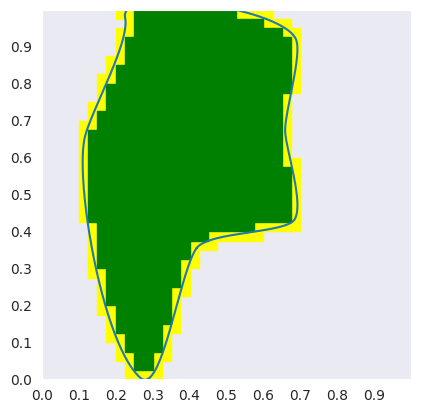

In [134]:
#this cell draws image and calculates inner rectangles

fig, ax = plt.subplots()
ax.set_aspect("equal")
step = 0.025
ax = fig.gca()
ax.set_xticks(np.arange(0, 1, 0.1))
ax.set_yticks(np.arange(0, 1., 0.1))

points = list(zip(x,y))

grid = generate_grid(0,1,step).tolist()

#x = [x, y, is_line, interior]
for xx in grid:
    hit = check_line(xx, points)
    if hit:
        xx.extend([1,1])
        ax.add_patch(patches.Rectangle((xx[0], xx[1]), step, step, color="yellow"))
    else:
        xx.extend([0,0])

data = np.arange(0,1,step)
for row_idx, poz_step in enumerate(data):
    x_on_line = list(filter(lambda xxx: xxx[1] == poz_step, grid))
    try:
        max_x = max(list(filter(lambda xdd: xdd[2] == 1, x_on_line)), key=lambda keyy: keyy[0])
        first_int_sqr = min(list(filter(lambda xdd: xdd[2] == 1, x_on_line)), key=lambda keyy: keyy[0])
        first_idx = x_on_line.index(first_int_sqr)
        counter = 0
        min_beg_elem = []
        while counter<len(x_on_line):
            if x_on_line[first_idx+counter][2] == 1:
                counter += 1
            elif x_on_line[first_idx+counter][2] == 0:
                min_beg_elem = x_on_line[first_idx+counter]
                break
    except ValueError:
        continue
    flag = False
    for idx, elem in enumerate(x_on_line):
        if elem == min_beg_elem:
            flag = True
            grid[grid.index(elem)][3] = 1
            ax.add_patch(patches.Rectangle((elem[0], elem[1]), step, step, color="green"))
        elif elem[0] == max_x[0]:
            break
        elif flag and (elem[2] == 0):
            grid[grid.index(elem)][3] = 1
            ax.add_patch(patches.Rectangle((elem[0], elem[1]), step, step, color="green"))
        elif flag and (elem[2] == 1):
            flag = not flag

plt.grid()
plt.plot(x,y)
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

In [ ]:
#Monte Carlo function

def strange_shape_calc(points_cnt, grid):
    hits = 0
    valid = list(filter(lambda x: x[3] == 1, grid))
    points_gen = [[uniform(0, 1), uniform(0, 1)] for _ in range(points_cnt)]
    for point in points_gen:
        for quadrat in valid:
            if (quadrat[0]<=point[0]) and (quadrat[0]+step>=point[0]) and (quadrat[1]<=point[1]) and (quadrat[1]+step>=point[1]):
                hits+=1
    return hits/points_cnt # return ratio instead of area * ratio bc area == 1

print(strange_shape_calc(100000, grid))